<a href="https://colab.research.google.com/github/Ganesh7134/Machine-downtime-analysis/blob/main/Machine_downtime_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/machine_downtime_dataset.csv")
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [ ]:
df.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

## **Dataset understanding**

* **Date** : The specifice date when the data was recorded useful for tracking when down time occurs and identifying patterns over time.

* **Machine_id** : The unique identifier for the machine helps in pinpointing which machine experiencing downtime.

* **Assembly_Line_No** : The number of the assembly line useful for identifying which part of the production process is affected by downtime.

* **Hydraulic_Pressure(bar)** : The pressure in the hydraulic system abnormal values could indicate issues leading to downtime.

* **Coolant_Pressure(bar)** : The pressure in the coolant system low or high pressure can cause machine malfunctions and downtime.

* **Air_System_Pressure(bar)** : The pressure in the air system. Inconsistent pressure could affect machine operation and cause downtime.

* **Coolant_Temperature** : The temperature of the coolant. Overheating or too low temperature can lead to machine failure and downtime.

* **Hydraulic_Oil_Temperature(°C)** : The temperature of the hydraulic oil. If too high or low, it might cause the hydraulic system to fail, leading to downtime.

* **Spindle_Bearing_Temperature(°C)** : The temperature of the spindle bearings. Excessive temperature can indicate bearing wear or failure, leading to downtime.

* **Spindle_Vibration(µm)** : The vibration level of the spindle. High vibration can indicate mechanical issues that may cause downtime.

* **Tool_Vibration(µm)** : The vibration level of the tool. Similar to spindle vibration, high levels can lead to tool wear or breakage, causing downtime.

* **Spindle_Speed(RPM)** : The rotational speed of the spindle. Deviations from normal speed can signal issues that could result in downtime.

* **Voltage(volts)** : The voltage supplied to the machine. Fluctuations or insufficient voltage can cause machine malfunctions and downtime.

* **Torque(Nm)** : The torque applied by the machine. Incorrect torque levels can indicate mechanical issues, potentially leading to downtime.

* **Cutting(kN)** : The cutting force applied during machining. Irregular cutting force can cause tool wear or breakage, leading to downtime.

* **Downtime** : The amount of time the machine is not operational. This is the key metric indicating how long the machine is down





In [ ]:
df.isna().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(°C)      16
Spindle_Bearing_Temperature(°C)     7
Spindle_Vibration(µm)              11
Tool_Vibration(µm)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [ ]:
df[df["Hydraulic_Pressure(bar)"].isna()]

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
464,24-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,5.150505,6.585693,9.9,44.4,32.2,0.436,18.025,15217.0,359.0,23.041749,1.95,No_Machine_Failure
884,20-01-2022,Makino-L2-Unit1-2015,Shopfloor-L2,NaN,5.105437,6.857677,21.3,43.7,28.7,0.798,32.605,14266.0,349.0,32.370456,2.17,No_Machine_Failure
1186,16-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,NaN,5.647666,6.776868,26.3,48.5,33.0,1.784,21.461,22597.0,251.0,31.620335,1.89,No_Machine_Failure
1299,15-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,3.895031,5.963325,25.8,44.3,36.2,1.412,34.024,14266.0,341.0,32.519299,3.14,No_Machine_Failure
1569,12-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,NaN,5.722600,6.002084,7.4,47.0,27.3,1.651,35.418,22896.0,330.0,20.850891,2.88,No_Machine_Failure
1886,08-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,NaN,3.105982,6.364663,11.9,47.5,31.1,0.896,20.729,16198.0,361.0,35.580334,2.88,No_Machine_Failure
2067,06-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,NaN,5.019139,6.836675,20.4,44.7,39.8,0.969,25.550,20184.0,443.0,23.652497,2.17,No_Machine_Failure
2313,03-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,NaN,3.895031,6.825966,20.3,53.0,38.1,0.898,28.098,20132.0,373.0,31.620335,2.60,No_Machine_Failure
2446,01-04-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,4.640599,6.141627,28.7,45.3,34.0,1.822,26.573,26526.0,400.0,25.488628,3.93,Machine_Failure
2461,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,5.425502,6.155373,24.3,50.1,33.8,0.849,27.087,17726.0,351.0,21.975787,1.91,No_Machine_Failure


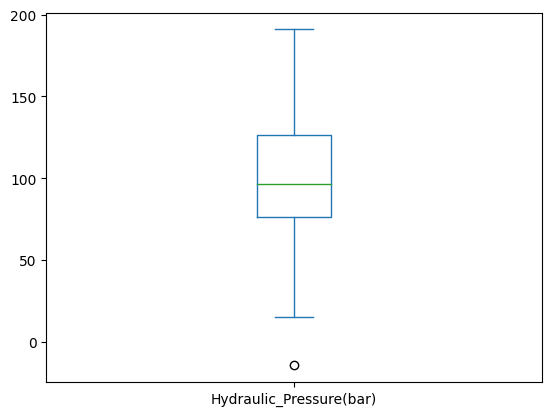

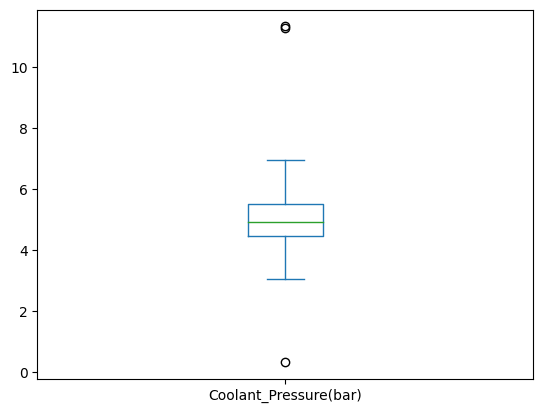

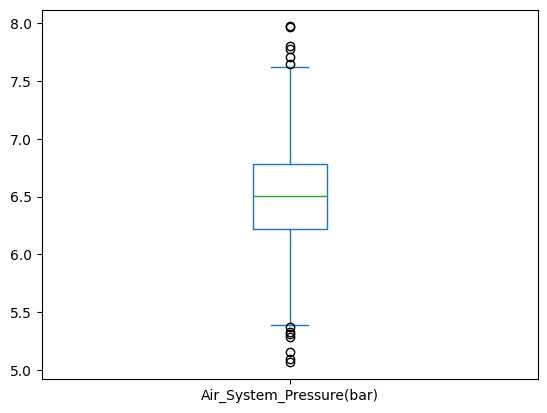

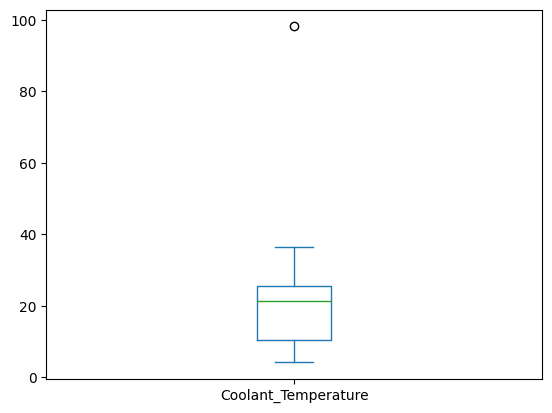

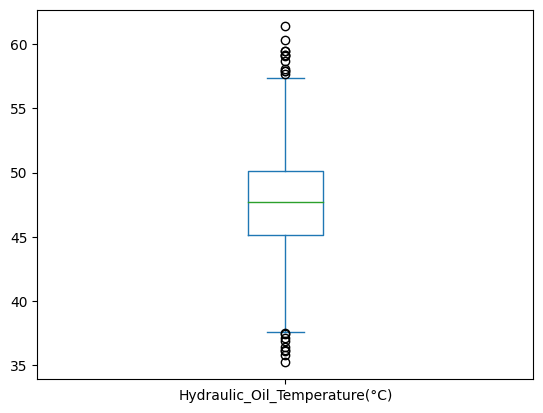

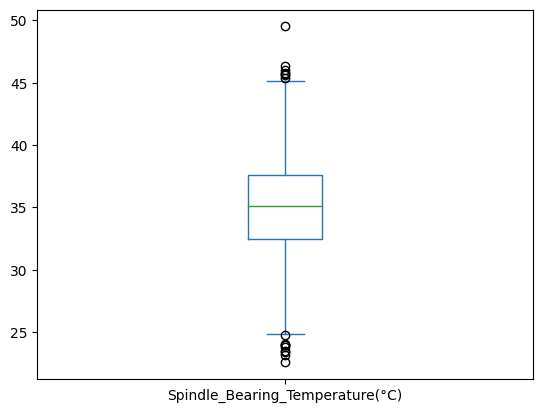

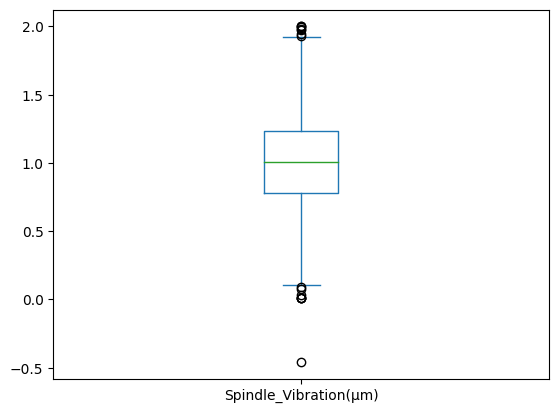

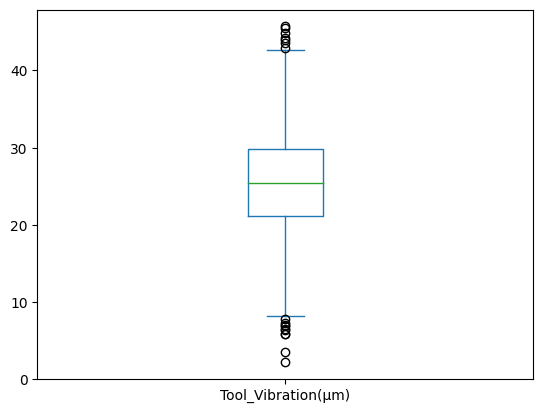

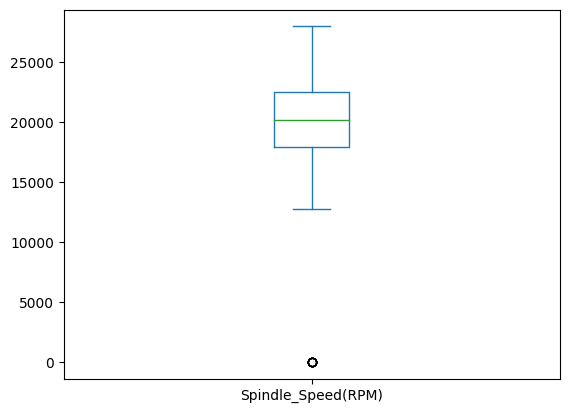

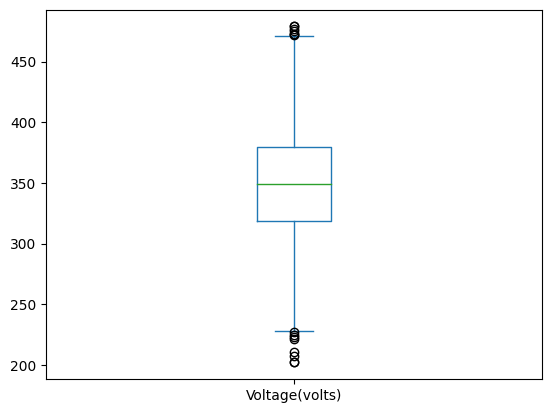

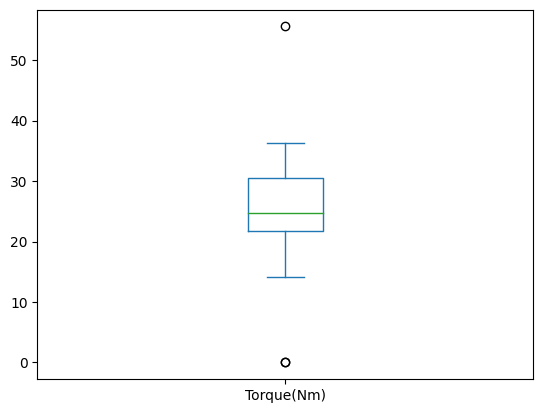

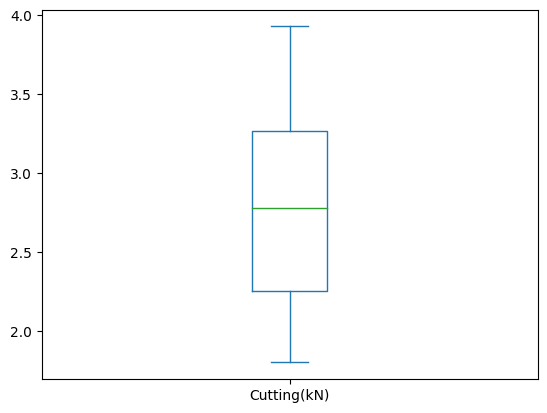

In [ ]:
for i in df.select_dtypes(include="number"):
  df[i].plot(kind="box")
  plt.show()

In [ ]:
df.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

In [ ]:
# Hydraulic_Pressure(bar) --> Mean
# Coolant_Pressure(bar) --> Mean
# Air_system_pressure --> Median
# Coolant_Temperature --> Mean
# Hydraulic_Oil_Temperature(°C) --> Median
# Spindle_Bearing_Temperature(°C) --> Median
# Spindle_Vibration(µm) --> Median
# Tool_Vibration(µm) --> Median
# Spindle_Speed(RPM) --> Mean
# Voltage(volts) --> Median
# Torque(NM) --> Mean
# Cutting(kN) --> Mean

In [ ]:
df["Hydraulic_Pressure(bar)"].fillna(df["Hydraulic_Pressure(bar)"].mean(), inplace=True)
df["Coolant_Pressure(bar)"].fillna(df["Coolant_Pressure(bar)"].mean(), inplace=True)
df["Air_System_Pressure(bar)"].fillna(df["Air_System_Pressure(bar)"].median(), inplace=True)
df["Coolant_Temperature"].fillna(df["Coolant_Temperature"].mean(), inplace=True)
df["Hydraulic_Oil_Temperature(°C)"].fillna(df["Hydraulic_Oil_Temperature(°C)"].median(), inplace=True)
df["Spindle_Bearing_Temperature(°C)"].fillna(df["Spindle_Bearing_Temperature(°C)"].median(), inplace=True)
df["Spindle_Vibration(µm)"].fillna(df["Spindle_Vibration(µm)"].median(), inplace=True)
df["Tool_Vibration(µm)"].fillna(df["Tool_Vibration(µm)"].median(), inplace=True)
df["Spindle_Speed(RPM)"].fillna(df["Spindle_Speed(RPM)"].mean(), inplace=True)
df["Voltage(volts)"].fillna(df["Voltage(volts)"].median(), inplace=True)
df["Torque(Nm)"].fillna(df["Torque(Nm)"].mean(), inplace=True)
df["Cutting(kN)"].fillna(df["Cutting(kN)"].mean(), inplace=True)

In [ ]:
df.isna().sum()

Date                               0
Machine_ID                         0
Assembly_Line_No                   0
Hydraulic_Pressure(bar)            0
Coolant_Pressure(bar)              0
Air_System_Pressure(bar)           0
Coolant_Temperature                0
Hydraulic_Oil_Temperature(°C)      0
Spindle_Bearing_Temperature(°C)    0
Spindle_Vibration(µm)              0
Tool_Vibration(µm)                 0
Spindle_Speed(RPM)                 0
Voltage(volts)                     0
Torque(Nm)                         0
Cutting(kN)                        0
Downtime                           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.to_csv("cleaned_data.csv", index=False)

In [ ]:
df.shape

(2500, 16)

In [ ]:
len(df.select_dtypes(include="number").columns)

12

### **Finding outliers using IQR (interquartile range)**

In [ ]:
outliers_dict = {}
for i in df.select_dtypes(include="number").columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  Q = Q3-Q1
  lower = Q1 - 1.5*Q
  upper = Q3 + 1.5*Q
  outliers = df.loc[(df[i] < lower) | (df[i] > upper)]
  outliers_dict[i] = outliers
for column , data in outliers_dict.items():
  print(column , len(data))

Hydraulic_Pressure(bar) 1
Coolant_Pressure(bar) 3
Air_System_Pressure(bar) 14
Coolant_Temperature 1
Hydraulic_Oil_Temperature(°C) 21
Spindle_Bearing_Temperature(°C) 16
Spindle_Vibration(µm) 16
Tool_Vibration(µm) 17
Spindle_Speed(RPM) 7
Voltage(volts) 15
Torque(Nm) 3
Cutting(kN) 0


## **Exploratory Data Anlaytics ( EDA )**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### **plotting distribution of the data using Q-Q plot**

* **On the Line**: Data points that lie on or very close to the line indicate the data follow a normal distribution.

* **Above the Line**: Data points that systematically fall above the line indicate that the data are positively skewed.

* **Below the Line**: Data points that systematically fall below the line indicate that the data are negatively skewed.

* **S-Shaped Curve**: Data points that form an "S" shape around the line indicate heavy tails, meaning the data have higher kurtosis than a normal distribution.

* **Hydraulic_Pressure(bar)**  =  heavy tails
* **Coolant_Pressure(bar)**  =  heavy tails
* **Air_System_Pressure(bar)**  =  outliers and slight heavy tails
* **Coolant_Temperature**  =  heavy tails
* **Hydraulic_Oil_Temperature(°C)**  =   slight positive
* **Spindle_Bearing_Temperature(°C)**  =  slight negative
* **Spindle_Vibration(µm)**  =   slight negative
* **Tool_Vibration(µm)**  =   approximately normal distributed
* **Spindle_Speed(RPM)**  =  heavy tails
* **Voltage(volts)**  =   slight negative
* **Torque(Nm)**  =  heavy tails
* **Cutting(kN)**  =  heavy tails

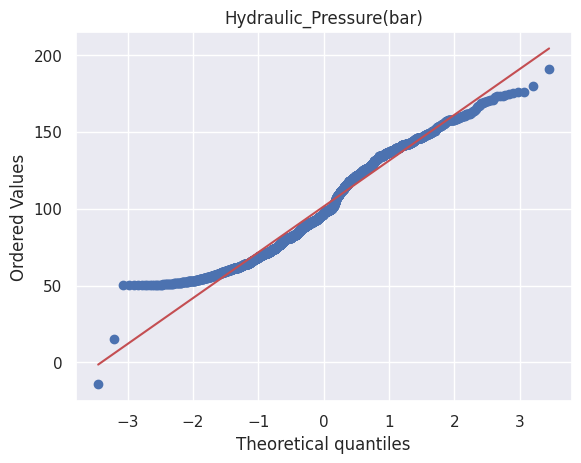

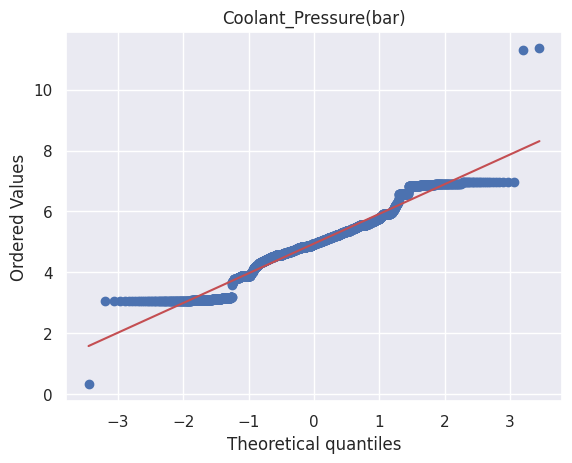

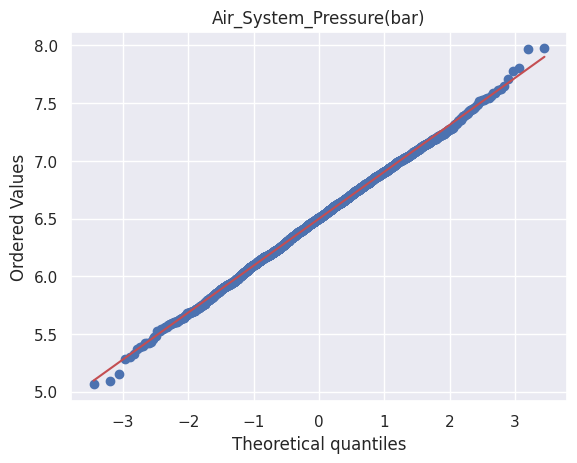

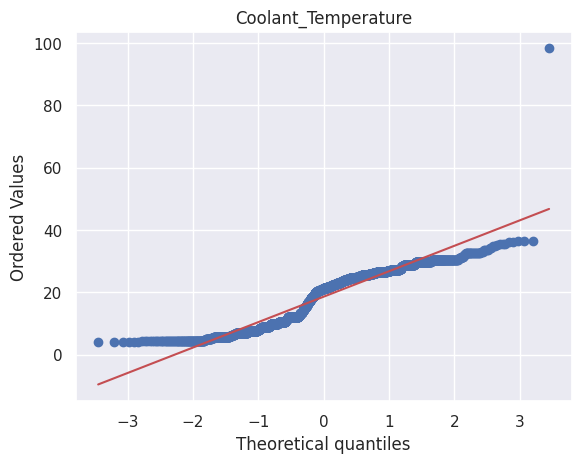

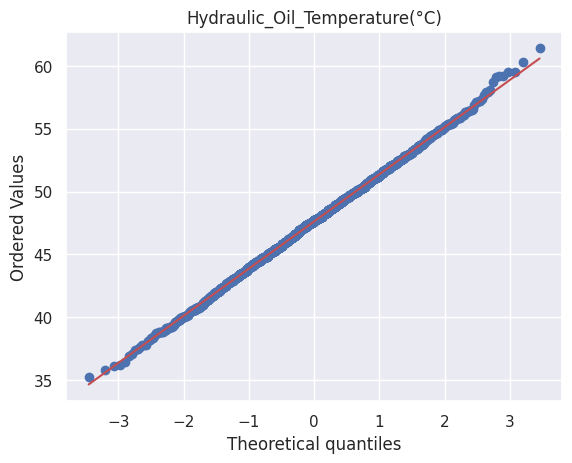

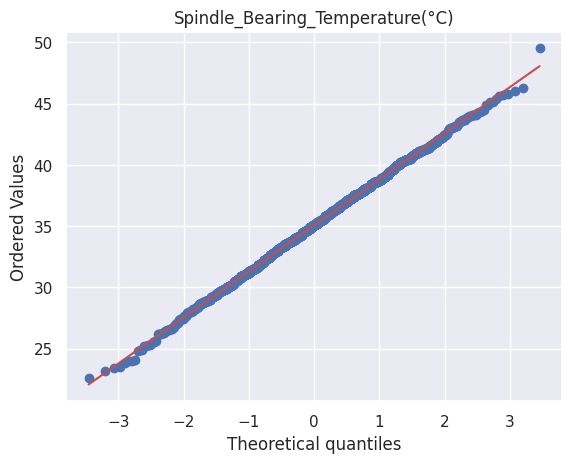

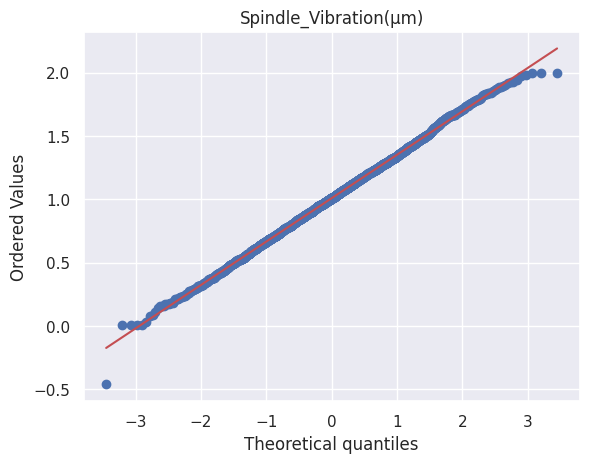

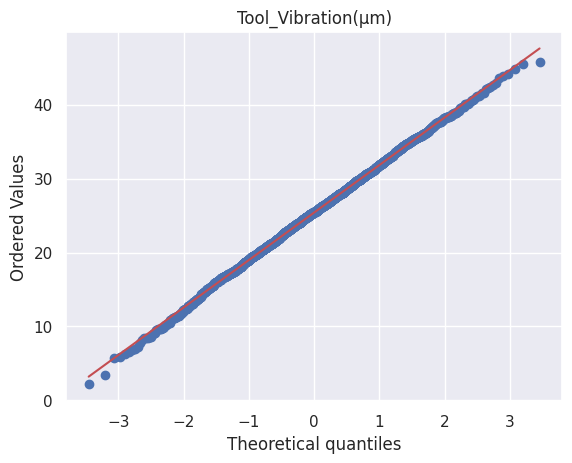

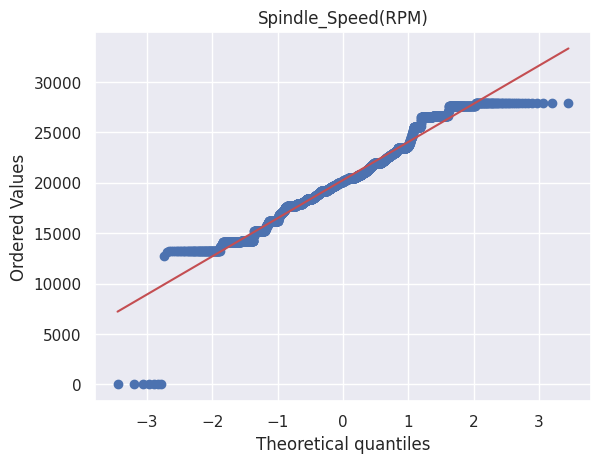

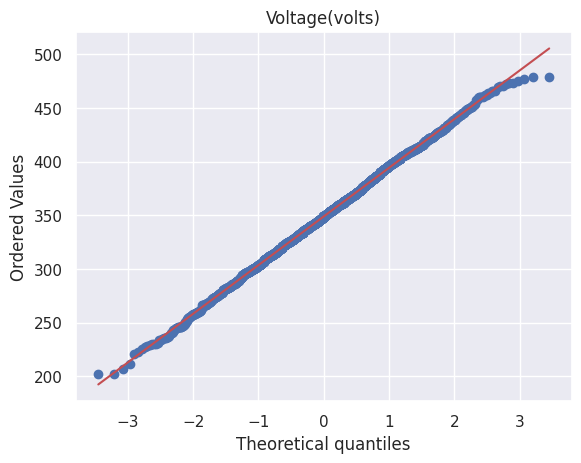

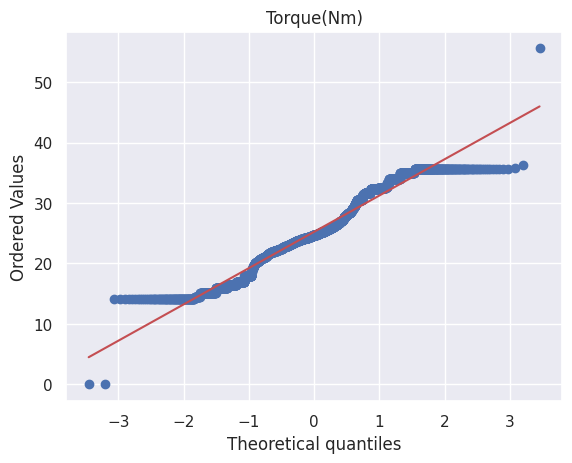

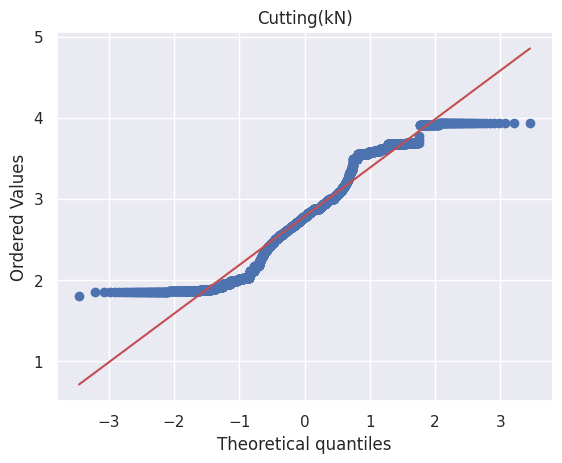

In [ ]:
from scipy.stats import kurtosis
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) # to apply standard color codes of seaborn
import scipy.stats as stats

for i in df.select_dtypes(include="number").columns:
  stats.probplot(df[i], dist="norm", plot=plt)
  plt.title(i)
  plt.show()

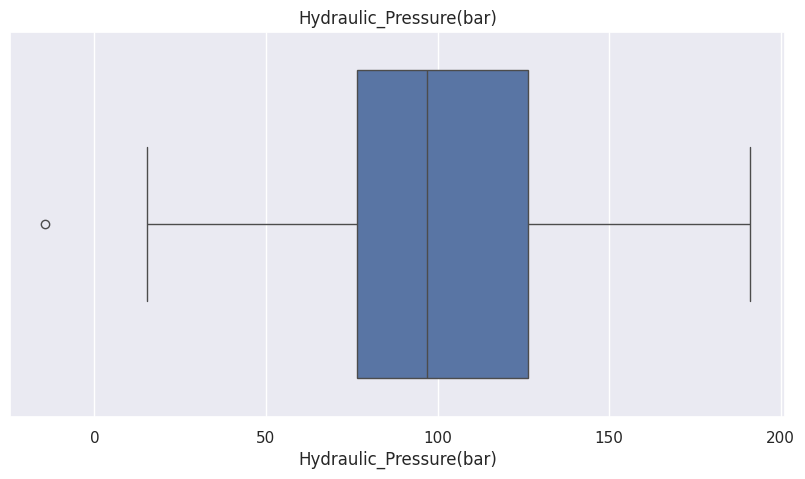

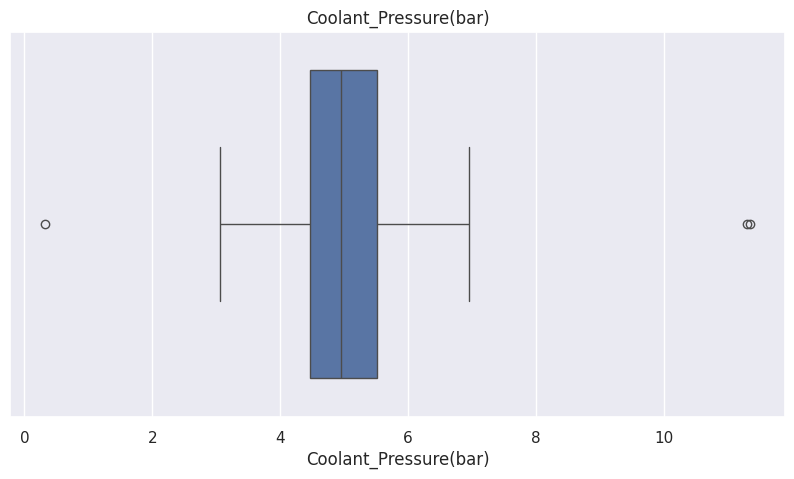

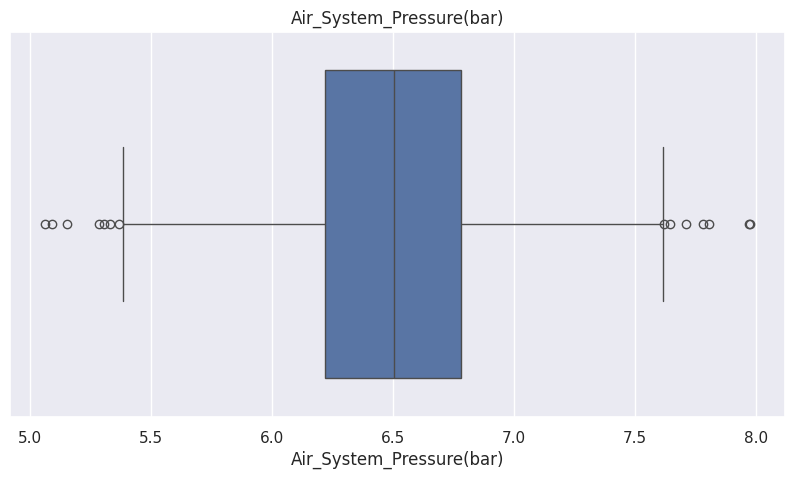

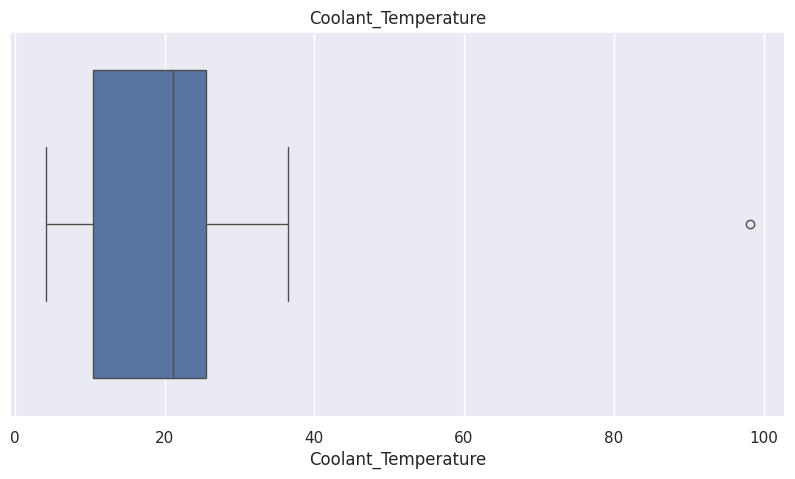

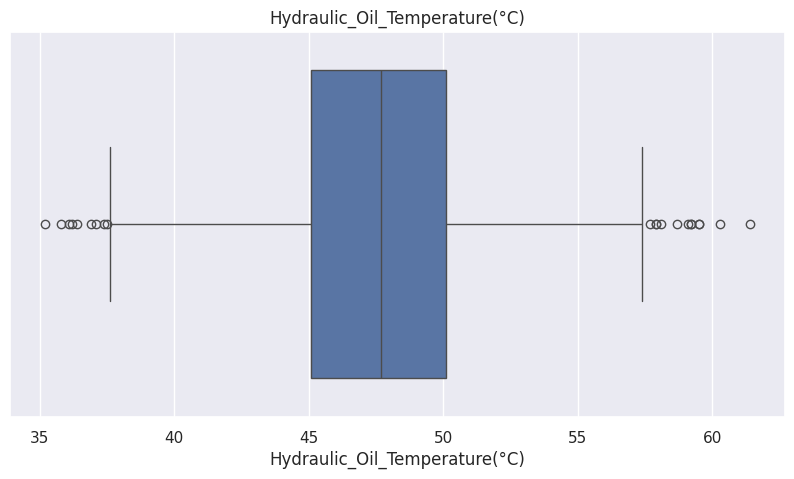

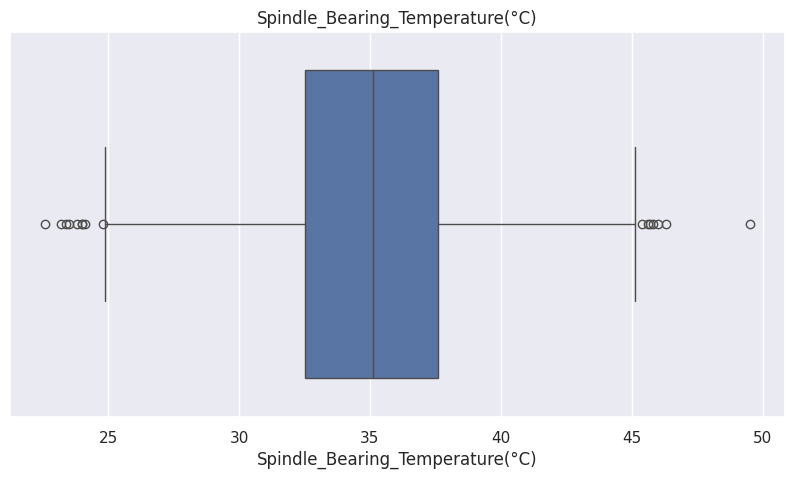

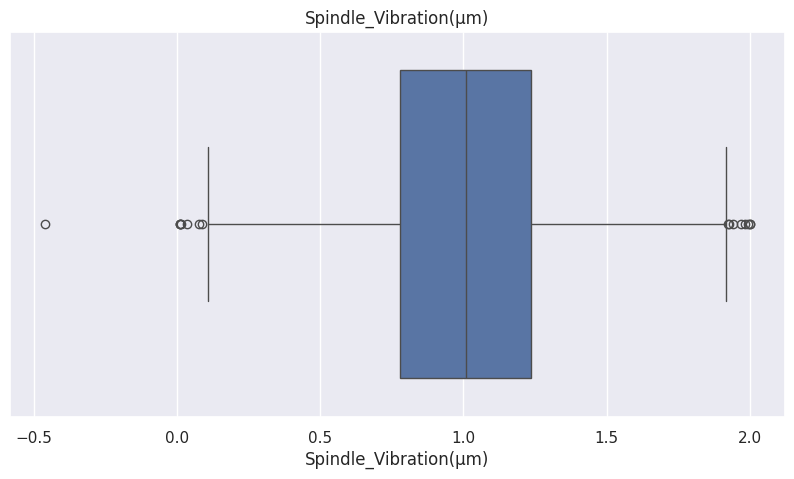

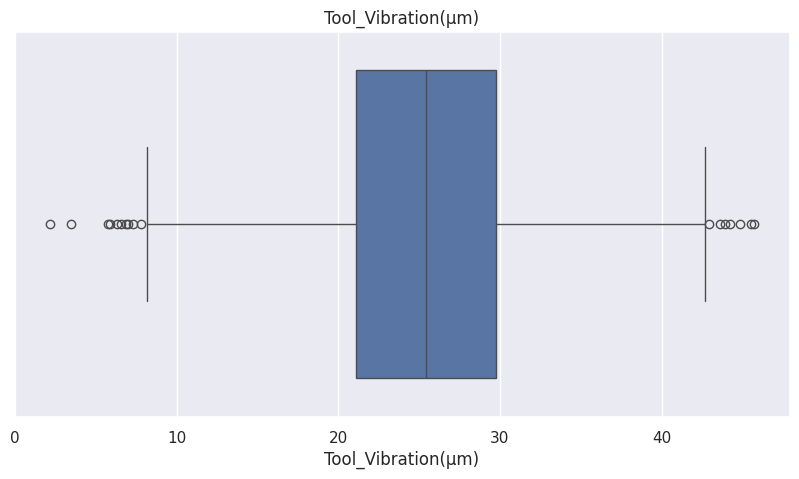

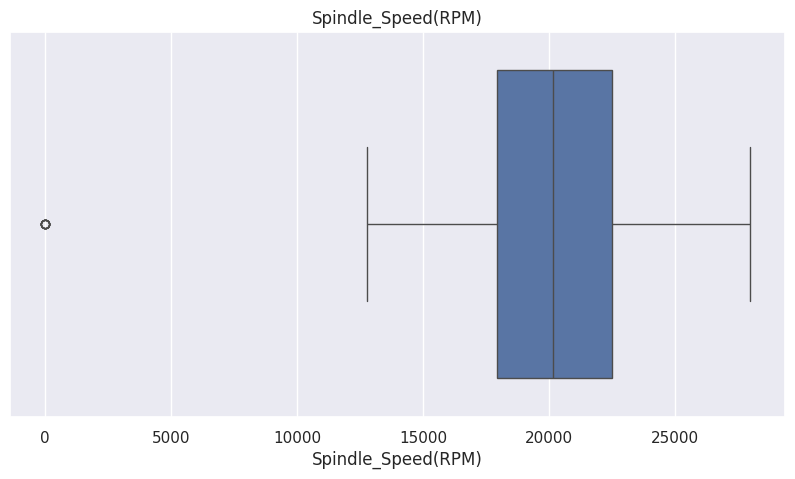

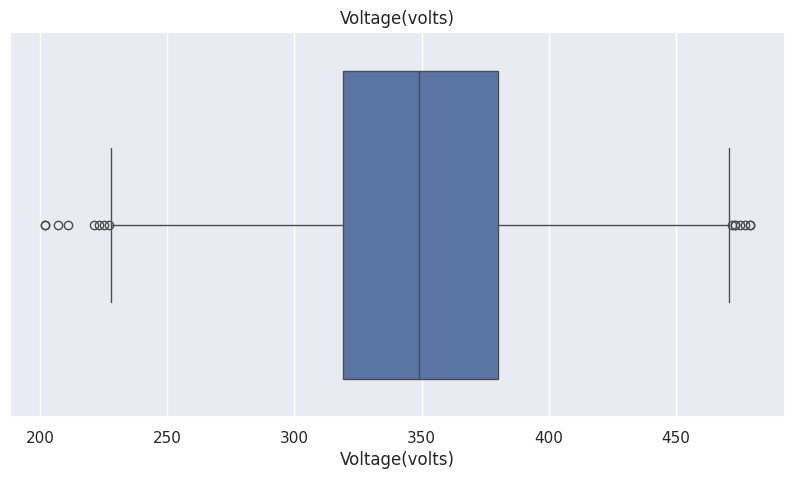

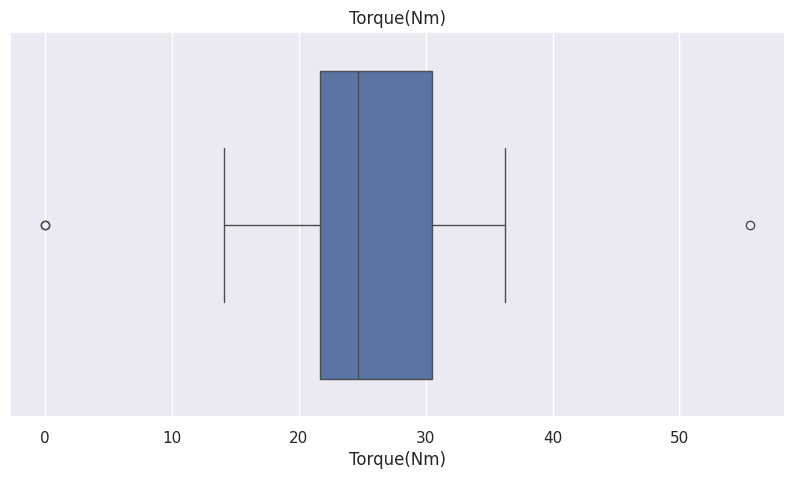

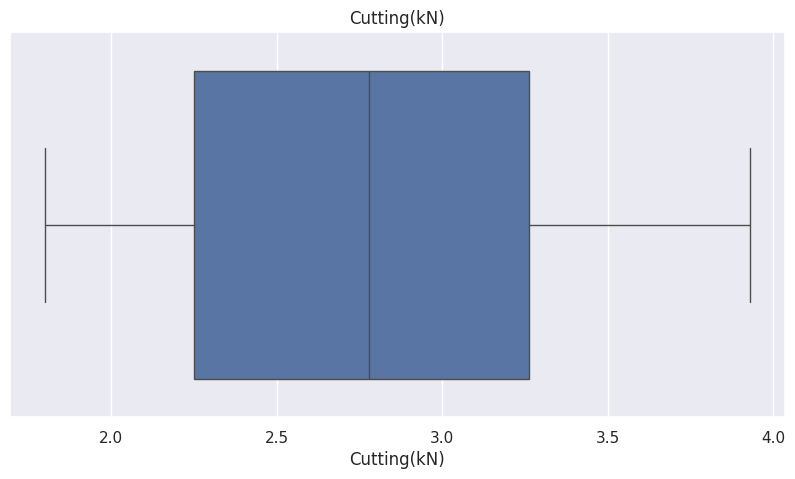

In [ ]:
for i in df.select_dtypes(include="number").columns:
  ax,figure = plt.subplots(figsize=(10,5))
  sns.boxplot(x=df[i])
  plt.title(i)
  plt.show()

## **Applying Transformations**:

### **Explanation**:

* **Log Transformation (np.log1p):** Applied to columns with heavy tails and outliers.
* **Square Root Transformation (np.sqrt):** Applied to columns with slight positive skew.
* **Reflection and Square Root Transformation:** Applied to columns with slight negative skew. The reflection is done by subtracting the values from the maximum value in the column.
* **No Transformation**: Applied to the column with approximately normal distribution.

### **Notes**:
* The np.log1p function is used instead of np.log to handle zero values (it computes log(1 + x)).
* You can uncomment the drop function call if you want to remove the original columns from the DataFrame.
* Replace the sample data generation with your actual data.







In [ ]:
# Apply transformations
df['Hydraulic_Pressure_log'] = np.log1p(df['Hydraulic_Pressure(bar)'])
df['Coolant_Pressure_log'] = np.log1p(df['Coolant_Pressure(bar)'])
df['Air_System_Pressure_log'] = np.log1p(df['Air_System_Pressure(bar)'])
df['Coolant_Temperature_log'] = np.log1p(df['Coolant_Temperature'])
df['Hydraulic_Oil_Temperature_sqrt'] = np.sqrt(df['Hydraulic_Oil_Temperature(°C)'])
df['Spindle_Bearing_Temperature_reflect_sqrt'] = np.sqrt(df['Spindle_Bearing_Temperature(°C)'].max() - df['Spindle_Bearing_Temperature(°C)'])
df['Spindle_Vibration_reflect_sqrt'] = np.sqrt(df['Spindle_Vibration(µm)'].max() - df['Spindle_Vibration(µm)'])
df['Tool_Vibration_normal'] = df['Tool_Vibration(µm)']  # No transformation needed
df['Spindle_Speed_log'] = np.log1p(df['Spindle_Speed(RPM)'])
df['Voltage_reflect_sqrt'] = np.sqrt(df['Voltage(volts)'].max() - df['Voltage(volts)'])
df['Torque_log'] = np.log1p(df['Torque(Nm)'])
df['Cutting_log'] = np.log1p(df['Cutting(kN)'])

In [ ]:
df.dropna(inplace=True)

Skewness value of Hydraulic_Pressure_log:  -0.2763066492716012
Kurtosis value of Hydraulic_Pressure_log:  -0.5645842619542871


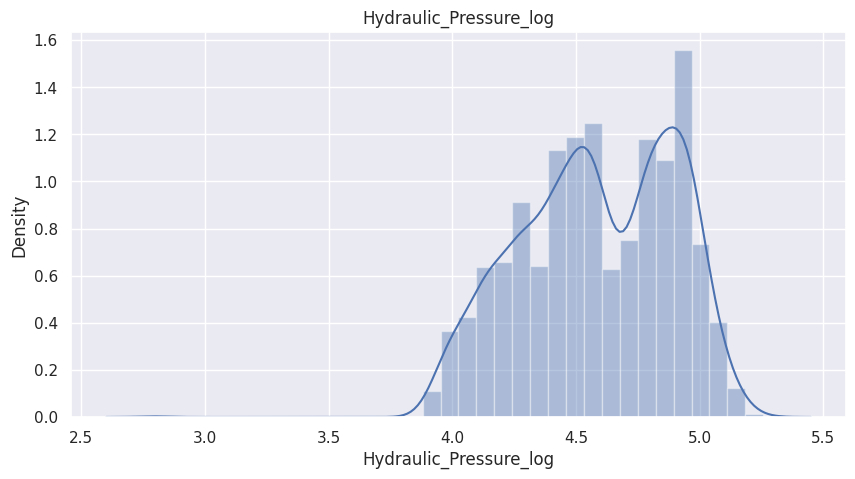

Skewness value of Coolant_Pressure_log:  -0.6391324668793467
Kurtosis value of Coolant_Pressure_log:  2.2138363910896732


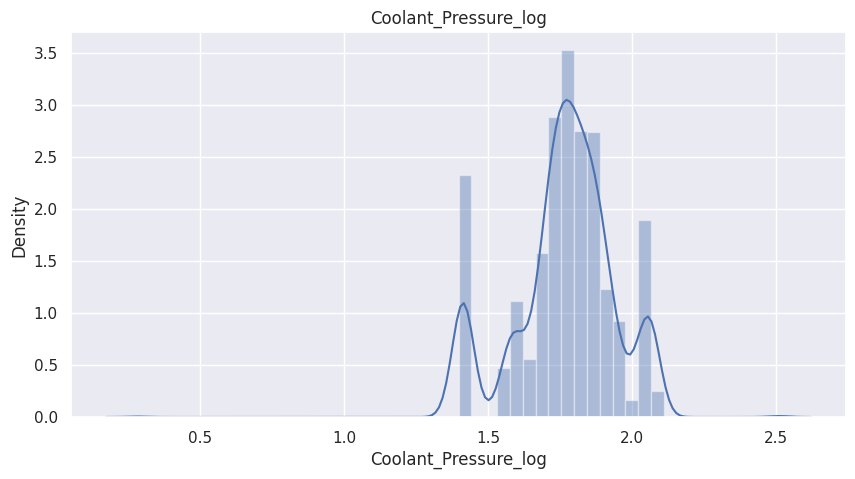

Skewness value of Air_System_Pressure_log:  -0.21891824276896193
Kurtosis value of Air_System_Pressure_log:  0.08170210292770719


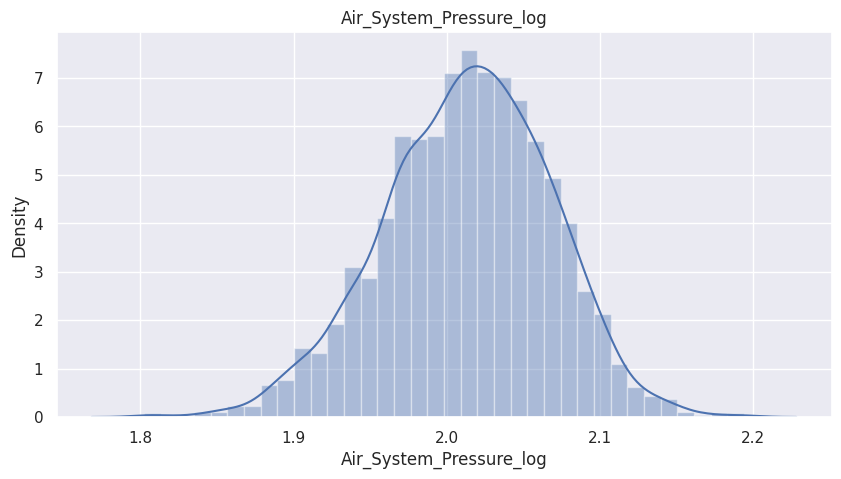

Skewness value of Coolant_Temperature_log:  -0.6776705405880039
Kurtosis value of Coolant_Temperature_log:  -0.8018858663728246


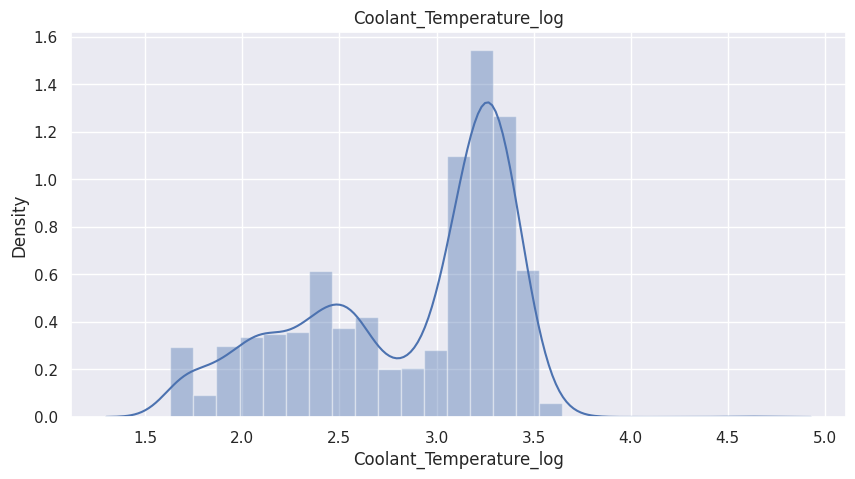

Skewness value of Hydraulic_Oil_Temperature_sqrt:  -0.1244481802570766
Kurtosis value of Hydraulic_Oil_Temperature_sqrt:  0.0736049178408873


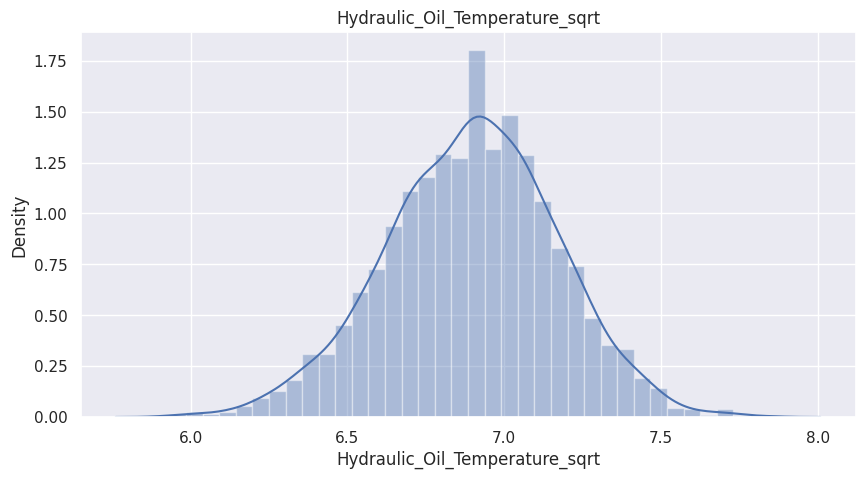

Skewness value of Spindle_Bearing_Temperature_reflect_sqrt:  -0.5056997888398022
Kurtosis value of Spindle_Bearing_Temperature_reflect_sqrt:  1.2753574760326085


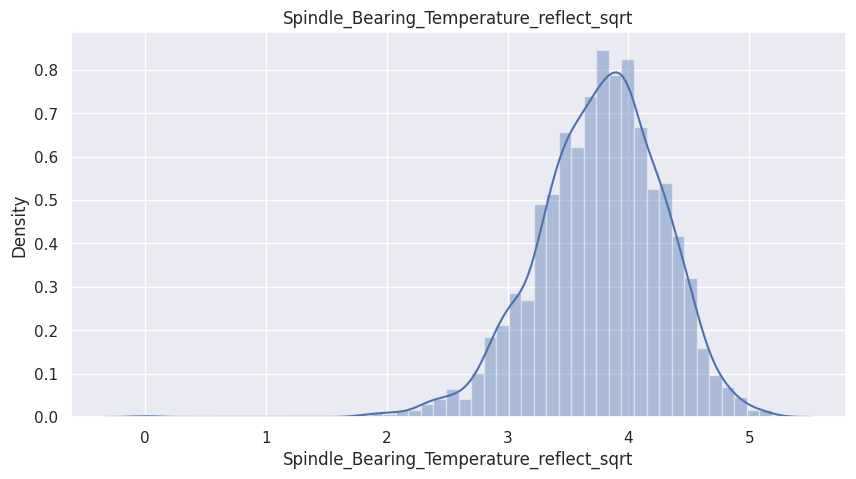

Skewness value of Spindle_Vibration_reflect_sqrt:  -0.7760999791153924
Kurtosis value of Spindle_Vibration_reflect_sqrt:  1.5269892821657534


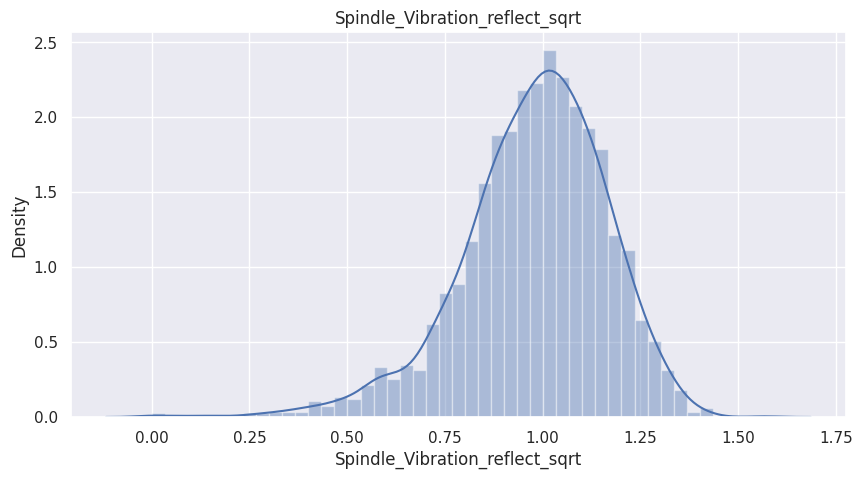

Skewness value of Tool_Vibration_normal:  -0.0619823250176126
Kurtosis value of Tool_Vibration_normal:  0.018861655653178655


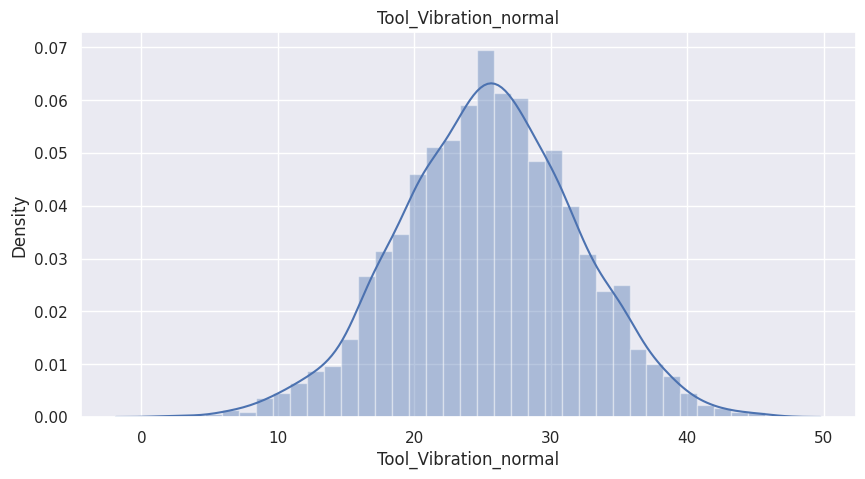

Skewness value of Spindle_Speed_log:  -15.77716584307566
Kurtosis value of Spindle_Speed_log:  277.96055056755165


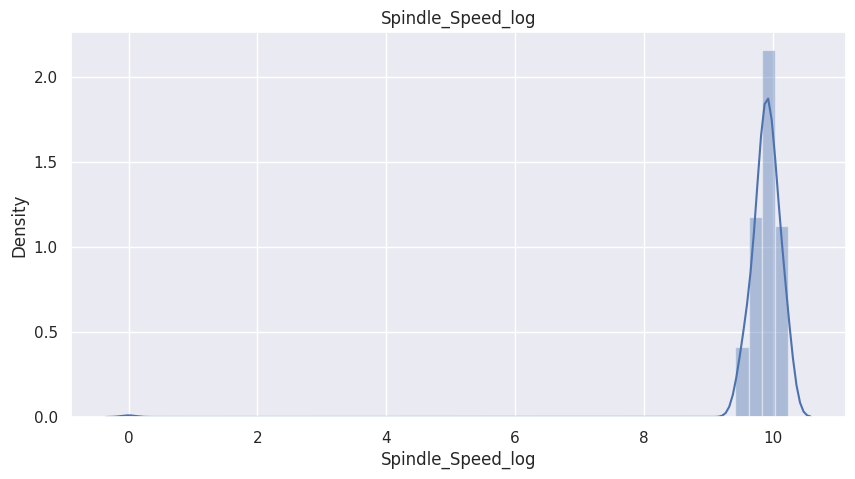

Skewness value of Voltage_reflect_sqrt:  -0.7252184553683226
Kurtosis value of Voltage_reflect_sqrt:  1.3781123423996195


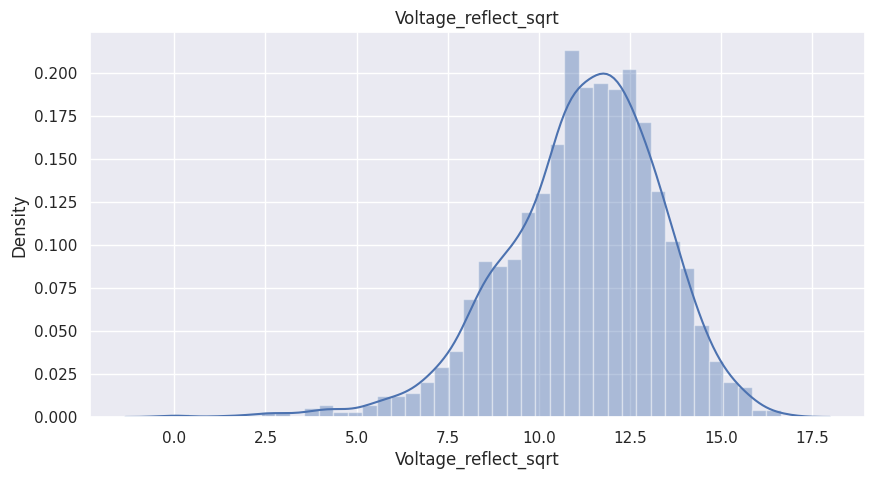

Skewness value of Torque_log:  -1.873176994943837
Kurtosis value of Torque_log:  18.61016856291225


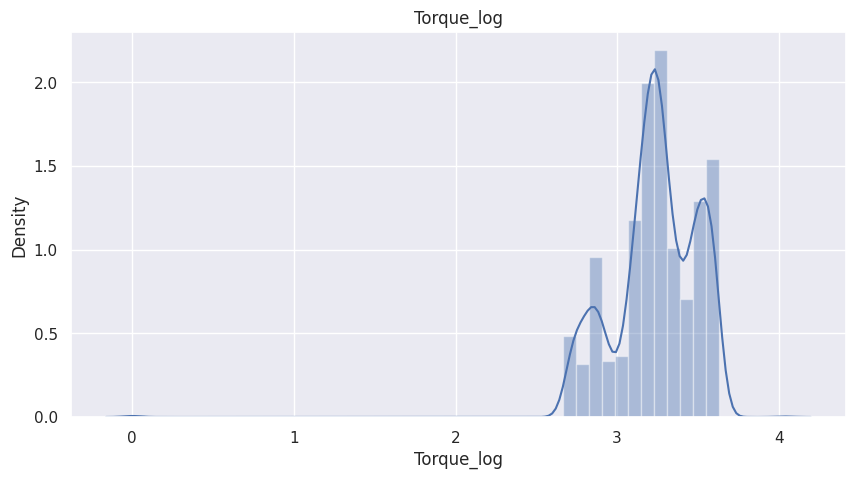

Skewness value of Cutting_log:  -0.10550187778468419
Kurtosis value of Cutting_log:  -1.108440067568969


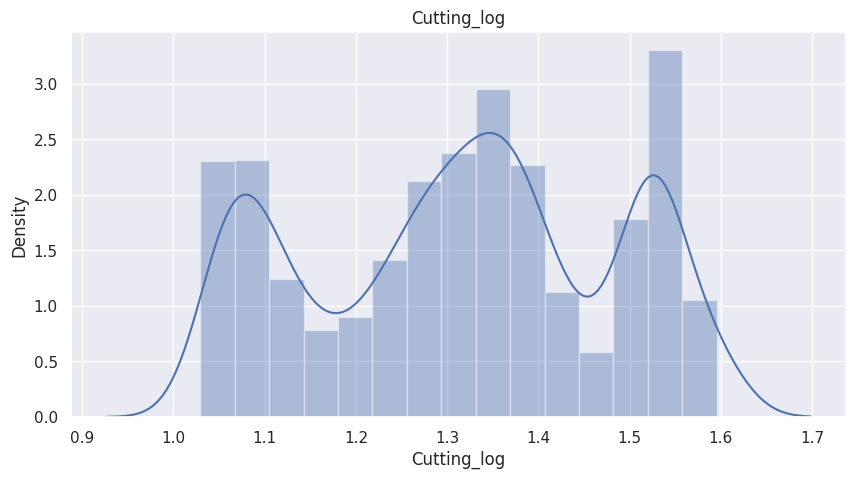

In [ ]:
from scipy.stats import kurtosis
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) # to apply standard color codes of seaborn
import scipy.stats as stats
col = df[['Hydraulic_Pressure_log',
       'Coolant_Pressure_log', 'Air_System_Pressure_log',
       'Coolant_Temperature_log', 'Hydraulic_Oil_Temperature_sqrt',
       'Spindle_Bearing_Temperature_reflect_sqrt',
       'Spindle_Vibration_reflect_sqrt', 'Tool_Vibration_normal',
       'Spindle_Speed_log', 'Voltage_reflect_sqrt', 'Torque_log',
       'Cutting_log']]

for i in col.columns:
  ax,figure = plt.subplots(figsize=(10,5))
  print(f"Skewness value of {i}: ",skew(col[i]))
  print(f"Kurtosis value of {i}: ",kurtosis(col[i]))
  sns.distplot(df[i])
  plt.title(i)
  plt.show()

In [ ]:
df.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime', 'Hydraulic_Pressure_log',
       'Coolant_Pressure_log', 'Air_System_Pressure_log',
       'Coolant_Temperature_log', 'Hydraulic_Oil_Temperature_sqrt',
       'Spindle_Bearing_Temperature_reflect_sqrt',
       'Spindle_Vibration_reflect_sqrt', 'Tool_Vibration_normal',
       'Spindle_Speed_log', 'Voltage_reflect_sqrt', 'Torque_log',
       'Cutting_log'],
      dtype='object')

## **Joint plot of Hydraulic Pressure (bar) vs Coolant Pressure (bar) With Respect To Machine Downtime**

### **Insight** : The majority of data points shows **less machine downtime failures** IN Hydraulic Pressure (bar) and **Machine downtime slightly high in Coolant Pressure (bar) column**

#### **Important reasons for machine downtime**:
  **Hydraulic Pressure (bar)** :
  * The typical normal hydraulic pressure for a fuel pump system is between **150 to 300 bar**.
  * By the result of below jointplot we can see that most of values concentrated between 50 to 150 bar.
  * **Low Pressure (<150 bar)**: May result in **inadequate fuel delivery, causing engine performance issues** or stalling ( stopped suddenly ).
  * **High Pressure (>300 bar)**: Can lead to **excessive stress on the pump and hydraulic lines, potentially causing leaks or system failures**.

**Coolant Pressure (bar)** :
  * The typical normal coolant pressure for a fuel pump system is between **1.0 to 1.5 bar**.
  * By the result of below joint plot we can see that most of the values concentrated approximately 3 to 7 bar.
  * **Low Pressure (<1.0 bar)**: May lead to inadequate cooling, **causing overheating and potential damage to the pump**.
  * **High Pressure (>1.5 bar)**: Can indicate **blockages or faults in the cooling system, potentially leading to leaks or burst hoses**

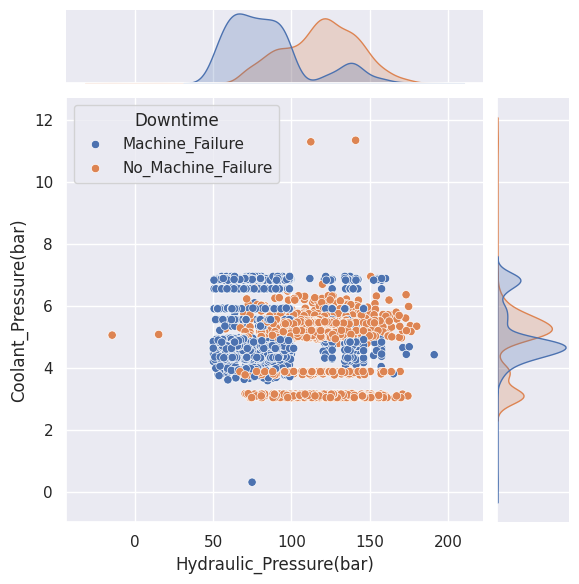

In [ ]:
sns.jointplot(x=df["Hydraulic_Pressure(bar)"], y=df["Coolant_Pressure(bar)"] , kind="scatter" , hue = df["Downtime"])
plt.show()

## **Count plot of Machine_ID with respect to Machine_downtime**

### **Insights** :

* For all three machines, the **downtime count for machine failure is slightly higher than for no machine failure**.
* **The oldest machine (Makino-11-vint1-2013) has the highest downtime counts for both scenarios**.
* There's a **general trend of decreasing downtime counts from the oldest to the newest machine**.
* The difference in **downtime between machine failure and no machine failure scenarios appears to be smallest for the newest machine (Makino-12-vint1-2015)**.
* The y-axis represents **the count of downtime incidents, with the maximum shown being around 450**.
> The graph uses a grouped bar chart format to facilitate easy comparison between machine failure and no machine failure scenarios for each machine.

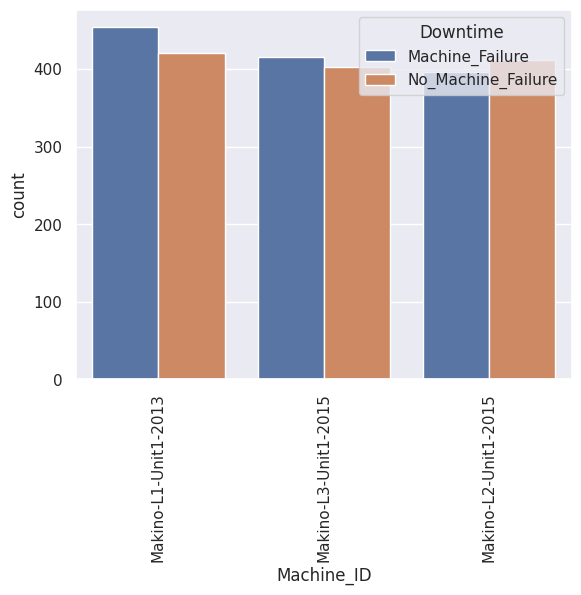

In [ ]:
sns.countplot(data = df , x = "Machine_ID" , hue = "Downtime")
plt.xticks(rotation=90)
plt.title("")
plt.show()

## **Count plot of Assembly_Line_No with respect to Machine_downtime**

### **Insights** :

* For all three assembly lines, **the downtime count for machine failure is slightly higher than for no machine failure**.
* Shopfloor-L1 has the highest downtime counts for both scenarios.
* There's a **trend of decreasing downtime counts from Shopfloor-L1 to Shopfloor-L2**.
* The difference in **downtime between machine failure and no machine failure scenarios appears to be smallest for Shopfloor-L2**.
* The y-axis represents the **count of downtime incidents, with the maximum shown being around 450**.
> The graph uses a grouped bar chart format to facilitate easy comparison between machine failure and no machine failure scenarios for each assembly line.

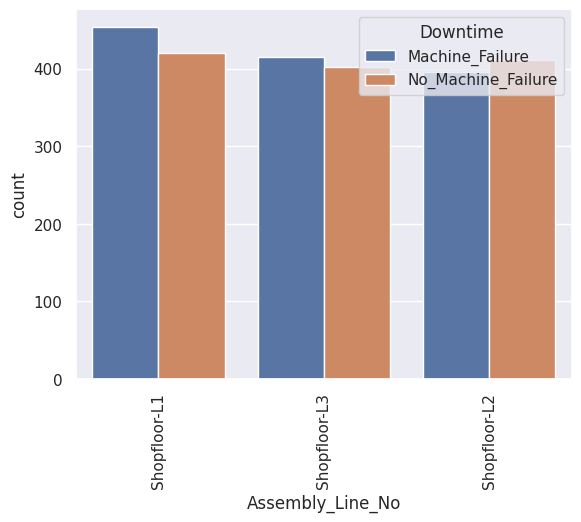

In [ ]:
sns.countplot(data = df , x = "Assembly_Line_No" , hue = "Downtime")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime', 'Hydraulic_Pressure_log',
       'Coolant_Pressure_log', 'Air_System_Pressure_log',
       'Coolant_Temperature_log', 'Hydraulic_Oil_Temperature_sqrt',
       'Spindle_Bearing_Temperature_reflect_sqrt',
       'Spindle_Vibration_reflect_sqrt', 'Tool_Vibration_normal',
       'Spindle_Speed_log', 'Voltage_reflect_sqrt', 'Torque_log',
       'Cutting_log'],
      dtype='object')

In [ ]:
date = pd.to_datetime(df["Date"])
df["Year"] = date.dt.year
df["Month"] = date.dt.month
df["Day"] = date.dt.day
df["Quarter"] = date.dt.quarter

## **Downtime Events by Month and Day**

### **Insights**:

* Data spans months 1-12, covering a full year.
* Each month is represented by a column of dots, with days on the y-axis (1-31).
* Blue dots represent Machine_Failure events, orange dots No_Machine_Failure events.
* Most downtime events occur in the first 6 months of the year.
* Months 1-5 show the highest frequency of downtime events, for both categories.
* There's a significant drop in events after month 6, with very few in months 7-11.
* A slight increase in events is seen in month 12.
* Machine failures and non-machine failures often occur on the same days, as indicated by overlapping dots.
* Some days (e.g., 30th and 31st) have fewer events, likely due to shorter months.
* The pattern suggests seasonal or cyclical factors influencing downtime events.

> This visualization effectively shows the temporal distribution of downtime events throughout a year, highlighting periods of higher and lower frequency.

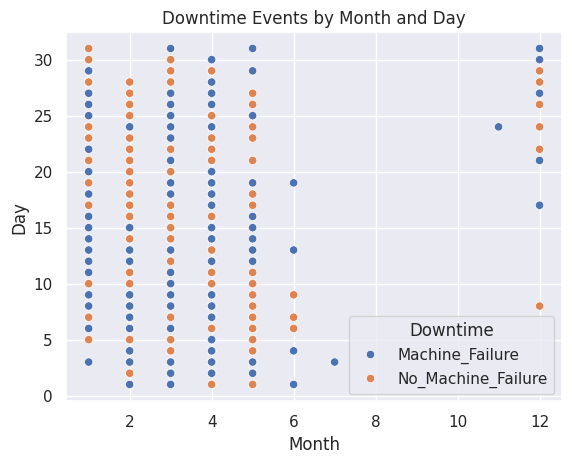

In [ ]:
sns.scatterplot(data = df , x = "Month" , y = "Day" , hue = "Downtime")
plt.title("Downtime Events by Month and Day")
plt.show()

## **Downtime Events by Month and Quarter**

### **Insights**:

* The x-axis shows months (1-12), while the y-axis represents quarters (1-4).
* Blue dots indicate Machine_Failure events, orange dots No_Machine_Failure events.
* Most downtime events occur in the first two quarters (Q1 and Q2).
* Machine failures are more frequent, appearing in more months than non-machine failures.
* Q1 (months 1-3) shows machine failures but no non-machine failures.
* Q2 (months 4-6) has both types of failures, with non-machine failures appearing in months 4 and 5.
* There's a single machine failure event in Q3 (month 7).
* Q4 (month 12) shows both types of failures occurring.
* The middle months of the year (8-11) show no downtime events of either type.
* The pattern suggests a potential seasonal trend in downtime events, with more occurrences in early and late parts of the year.

> This visualization effectively summarizes the quarterly and monthly distribution of downtime events, highlighting periods of higher risk for both types of failures.

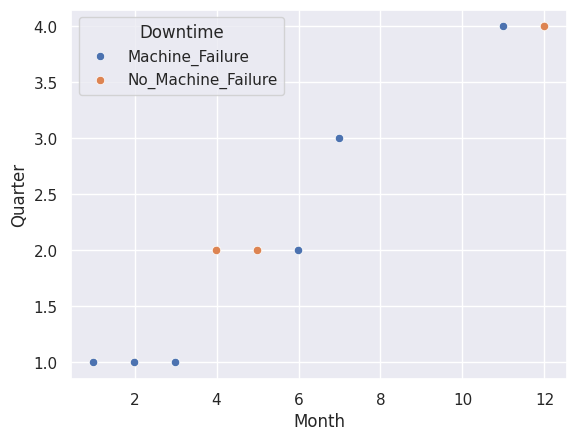

In [ ]:
sns.scatterplot(data = df , x = "Month" , y = "Quarter" , hue = "Downtime")
plt.show()

## **Downtime Events by Year and Month**

### **Insights**

* There's only one data point for each category in 2021, both showing high downtime duration (around 11-12 months).
* Multiple data points are shown, with downtimes ranging from about 1 to 7 months.
* In 2022, machine failures generally resulted in longer downtimes compared to non-machine failure causes.
* The 2022 data suggests a possible decreasing trend in downtime duration for both categories as the year progressed, but more data would be needed to confirm this.
* The 2021 data points could be considered outliers due to their significantly higher downtime duration compared to 2022 data.

> To gain more comprehensive insights, additional context about the nature of the machine operations, maintenance practices, and any interventions implemented between 2021 and 2022 would be helpful.

In [ ]:
df["Year"].value_counts()

Year
2022    2475
2021      25
Name: count, dtype: int64

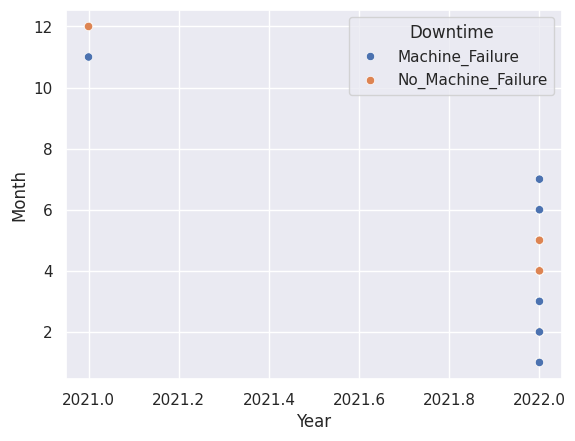

In [ ]:
sns.scatterplot(data = df , x = "Year" , y = "Month" , hue = "Downtime")
plt.show()

In [ ]:
df.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime', 'Hydraulic_Pressure_log',
       'Coolant_Pressure_log', 'Air_System_Pressure_log',
       'Coolant_Temperature_log', 'Hydraulic_Oil_Temperature_sqrt',
       'Spindle_Bearing_Temperature_reflect_sqrt',
       'Spindle_Vibration_reflect_sqrt', 'Tool_Vibration_normal',
       'Spindle_Speed_log', 'Voltage_reflect_sqrt', 'Torque_log',
       'Cutting_log', 'Year', 'Month', 'Day', 'Quarter'],
      dtype='object')

## **Joint plot of Air_System_Pressure(bar) vs Coolant_Temperature With Respect To Machine Downtime**

### **Insights** :

* Air System Pressure ranges from 5.0 to 8.0 bar, with most values between 5.5 and 7.5 bar.
* Coolant Temperature shows a bimodal distribution, clustering around 5-15°C and 20-35°C.
* There's no clear separation between Machine Failure and No Machine Failure data points, suggesting these parameters alone are not strong predictors of failure.
* A single outlier exists for No Machine Failure at very high Coolant Temperature (near 100°C).
* The Air System Pressure distribution is roughly normal and slightly right-skewed.
* No strong correlation is visible between Air System Pressure and Coolant Temperature.



#### **Important reasons for machine downtime**:

**Air_System_Pressure(bar)** :
* The typical normal air pressure for a fuel pump system is between 6 to 8 bar.
* By the result of below jointplot we can see that most of values concentrated between 5 to 8 bar
* **Low Pressure (<6 bar)**: May result in poor fuel atomization, leading to incomplete combustion and reduced engine performance.
* **High Pressure (>8 bar)**: Can cause excessive stress on the pump and air lines, potentially leading to leaks or system failures.

**Coolant_Temperature** :
* The typical normal coolant temperature for a fuel pump system is between 85°C to 95°C.
* By the result of below jointplot we can see that most of values concentrated between 5-15°C and 20-35°C.
* **Low Temperature (<85°C)**: May result in inefficient fuel atomization and reduced engine performance.
* **High Temperature (>95°C)**: Can indicate overheating, leading to potential damage to the pump, seals, and other components.



In [ ]:
sns.jointplot(data = df , x = 'Air_System_Pressure(bar)', y = 'Coolant_Temperature' , hue = "Downtime" , kind = "scatter")
plt.show()

## **Joint plot of Hydraulic_Oil_Temperature(°C) vs Spindle_Bearing_Temperature(°C) With Respect To Machine Downtime**

### **Insights** :

* Hydraulic Oil Temperature ranges from approximately 35°C to 65°C, with most values clustered between 40°C and 55°C.
* Spindle Bearing Temperature ranges from about 25°C to 50°C, concentrating between 30°C and 45°C.
* There's no clear correlation between Hydraulic Oil Temperature and Spindle Bearing Temperature. The scatter plot shows a roughly circular or slightly elliptical distribution, which doesn't indicate a strong linear relationship between these variables.
* Machine Failure and No Machine Failure data points significantly overlap, suggesting these parameters alone aren't strong failure predictors.
* The distribution of both temperatures appears roughly normal, with Spindle Bearing Temperature showing a slightly tighter distribution.

**Hydraulic_Oil_Temperature(°C)** :

* The typical normal hydraulic oil temperature for a fuel pump system is between 40°C to 60°C.
* By the result of below joint plot we can see that Hydraulic Oil Temperature ranges from approximately 35°C to 65°C.
* **Low Temperature (<40°C)**: May result in increased oil viscosity, leading to poor lubrication and inefficient pump operation.
* **High Temperature (>60°C)**: Can cause oil thinning, reducing its lubrication properties and potentially leading to component wear or failure.

**Spindle_Bearing_Temperature(°C)** :

* The typical normal spindle bearing temperature for a fuel pump system is between 60°C to 80°C.
* By the result of below joint plot we can see that Spindle Bearing Temperature ranges from about 25°C to 50°C, concentrating between 30°C and 45°
* **Low Temperature (<60°C)**: May result in increased bearing friction due to inadequate lubrication flow.
* **High Temperature (>80°C)**: Can cause lubrication breakdown, leading to increased wear and potential bearing failure.

In [ ]:
sns.jointplot(data = df , x = 'Hydraulic_Oil_Temperature(°C)', y = 'Spindle_Bearing_Temperature(°C)' , hue = "Downtime" , kind = "scatter")
plt.show()

## **Joint plot of Spindle_Vibration(µm) vs Tool_Vibration(µm) With Respect To Machine Downtime**

### **Insights** :

* Machine failure is more likely when spindle vibration is around 0.5 μm.
* Machine failure is less likely when tool vibration is below 10 μm.
* Machine failure cases are distributed in a wider range of both spindle vibration and tool vibration, compared to no failure cases.

**Spindle_Vibration(µm)** :    

* The typical normal spindle vibration level for a fuel pump system is below 1.0 mm/s.
* By the below joint plot we can see that Machine failure is more likely when spindle vibration is around 0.5 μm.
* **Low Vibration (<1.0 µm)**: Indicates smooth operation and well-balanced components.
* **High Vibration (>1.0 µm)**: Can indicate misalignment, imbalance, or bearing wear, leading to potential damage or failure of the spindle and other components.

**Tool_Vibration(µm)** :  

* The typical normal tool vibration level for a fuel pump manufacturing system is below 2.5 mm/s.

* By the below joint plot we can see that most of the data points are concentrated between 10µm and 40µm.

* **Low Vibration (<2.5 µm)**: Indicates smooth operation and well-maintained equipment.
*	**High Vibration (>2.5 µm)**: Can indicate tool misalignment, imbalance, or wear, leading to potential damage or failure of the tools and equipment, and possible defects in the manufactured products


In [ ]:
sns.jointplot(data = df , x = 'Spindle_Vibration(µm)', y = 'Tool_Vibration(µm)' , hue = "Downtime" , kind = "scatter")
plt.show()

## **Joint plot of Spindle_Speed(RPM) vs Voltage(volts) With Respect To Machine Downtime**

### **Insights** :    

* Machine failure is more likely at lower spindle speeds (around 0 RPM).
* Machine failure is less likely at higher spindle speeds (around 25,000 RPM).
* There is a weak positive correlation between spindle speed and voltage for both machine failure and no machine failure cases.
* Machine failure cases have a wider range of voltage values compared to no failure cases.
* There is a slight difference in the distribution of voltage between machine failure and no machine failure cases, as seen in the right plot.

**Spindle_Speed(RPM)** :    

* The typical normal spindle speed for a fuel pump system is between 500 to 3000 RPM.
* By the below joint plot we can see that most of the data points are lied between 15000 RPM to approximately 28000 RPM.
* **Low Speed (<500 RPM)**: May result in inefficient pump operation and poor fuel atomization.
* **High Speed (>3000 RPM)**: Can cause excessive wear, overheating, and potential failure of the spindle and other components

**Voltage(volts)** :    
* The typical normal voltage level for a fuel pump system is between 12 to 14 volts (for a 12V system commonly used in automotive applications).
* By the below plot we can see that most of the data points are lied between 250 volts to 450 volts.
* **Low Voltage (<12V)**: May result in insufficient power supply to the fuel pump, leading to poor performance or failure to operate.
* **High Voltage (>14V)**: Can cause overheating, damage to the pump's electrical components, and reduced lifespan


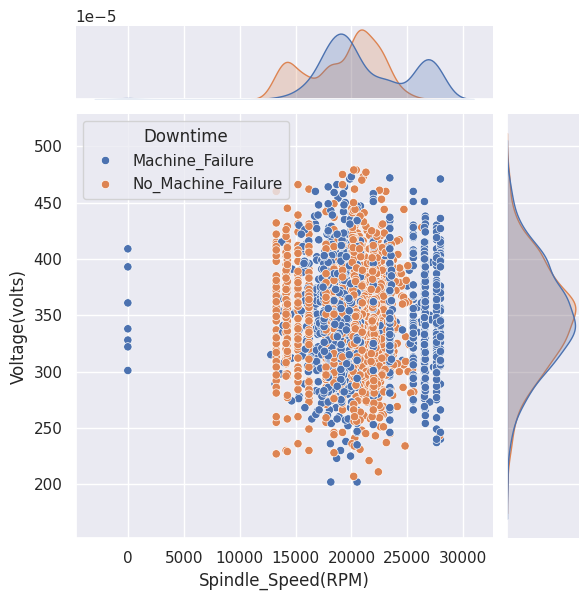

In [ ]:
sns.jointplot(df , x = 'Spindle_Speed(RPM)', y = 'Voltage(volts)' , hue = "Downtime" , kind = "scatter")
plt.show()

## **Joint plot of Torque(Nm) vs Cutting(kN) With Respect To Machine Downtime**

## **Insights** :    

* Machine failure is more likely when torque is between 10-20 Nm.
* Machine failure is less likely when torque is above 30 Nm.
* Machine failure is also less likely when cutting force is above 3 kN.
* There is a slight positive correlation between torque and cutting force for both machine failure and no machine failure cases.
* Machine failure cases are distributed in a narrower range of cutting force compared to no failure cases.

**Torque(Nm)** :    
* The typical normal torque level for a fuel pump system assembly is between 20 to 30 Nm for standard bolts and components.
* By the below joint plot we can see that most of the values concentrated between 20 to 35 NM.
* **Low Torque (<20 Nm)**: May result in loose connections, leading to leaks, vibrations, or component disassembly.
* **High Torque (>30 Nm)**: Can cause threads to strip, bolts to break, or components to crack, reducing the lifespan and reliability of the fuel pump.

**Cutting(kN)** :    

* The typical normal cutting force for a fuel pump system assembly is between 5 to 10 kN  ( Kilonewtons )for standard cutting operations.
* By the below joint plot we can see that most of the values concentrated between 2 to 3.5 kN.
* **Low Cutting Force (<5 kN)**: May result in incomplete cuts, burrs, or rough edges, leading to poor assembly quality and potential malfunction.
* **High Cutting Force (>10 kN)**: Can cause excessive tool wear, breakage, or deformation of components, reducing the lifespan and reliability of the fuel pump.


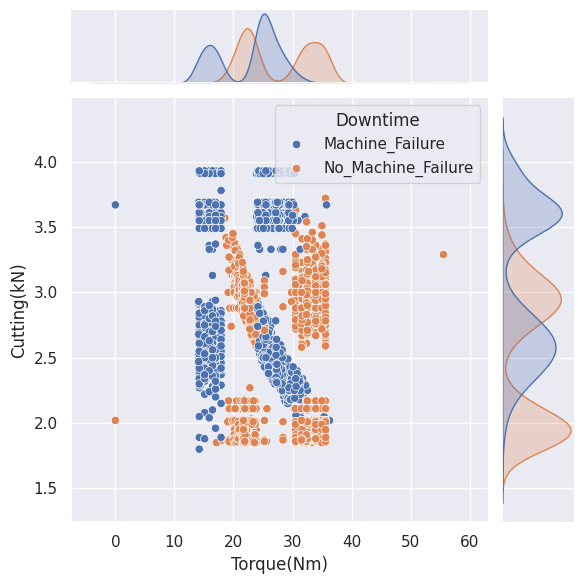

In [ ]:
sns.jointplot(df , x = 'Torque(Nm)', y = 'Cutting(kN)' , hue = "Downtime" , kind = "scatter")
plt.show()

In [ ]:
from scipy.stats import spearmanr
dic = {"Column_name":[] , "Correlation_value" : [] , "Statistical_evidence (P - value)" : []}
for i in df.columns:
  if i not in ["Downtime"]:
    dic["Column_name"].append(i)
    dic["Correlation_value"].append(spearmanr(df[i] , df["Downtime"])[0])
    dic["Statistical_evidence (P - value)"].append(spearmanr(df[i] , df["Downtime"])[1])


### **Spearmaan correlation to find correlation between categorical and target variable with an evidence 'P' value**
***
* we need to check the evidence value P <= 0.05 we reject the null hypothesis then we can say that there is **significant correlation with target variable** with **Statistical evidance**.
* we need to check the evidence value P > 0.05 we accept the null hypothesis then we can say that there is no **significant correlation with target variable** with **Statistical evidance**.

> **On seeinng below results most of the columns are not having significant correlation with target variable**

In [ ]:
corr_df = pd.DataFrame(dic)
corr_df

,Column_name,Correlation_value,Statistical_evidence (P - value)
0,Date,-0.010746,5.913260e-01
1,Machine_ID,0.010092,6.140749e-01
2,Assembly_Line_No,0.010092,6.140749e-01
3,Hydraulic_Pressure(bar),0.572108,2.983231e-217
4,Coolant_Pressure(bar),0.010988,5.829915e-01
5,Air_System_Pressure(bar),-0.009640,6.300461e-01
6,Coolant_Temperature,-0.206519,1.782723e-25
7,Hydraulic_Oil_Temperature(°C),0.008797,6.602469e-01
8,Spindle_Bearing_Temperature(°C),0.020342,3.093927e-01
9,Spindle_Vibration(µm),0.016228,4.174184e-01


In [ ]:
df.to_csv("New_modified_machine_downtime_dataset.csv",index = False)

## **Machine learning model building**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report , roc_curve , roc_auc_score

X = df[['Machine_ID','Month','Hydraulic_Pressure_log',
       'Coolant_Pressure_log', 'Air_System_Pressure_log',
       'Coolant_Temperature_log', 'Hydraulic_Oil_Temperature_sqrt',
       'Spindle_Bearing_Temperature_reflect_sqrt',
       'Spindle_Vibration_reflect_sqrt', 'Tool_Vibration_normal',
       'Spindle_Speed_log', 'Voltage_reflect_sqrt', 'Torque_log',
       'Cutting_log']]
Y = df["Downtime"]

Y = Y.map({"Machine_Failure" : 1 , "No_Machine_Failure" : 0 })

OH = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the 'Machine_ID' column
Machine_id_ohe = OH.fit_transform(X[["Machine_ID"]]).toarray()

# Concatenate the one-hot encoded 'Machine_ID' with the rest of the DataFrame
# Convert X_df back to a NumPy array after dropping 'Machine_ID'
X = np.concatenate((X[['Month','Hydraulic_Pressure_log',
       'Coolant_Pressure_log', 'Air_System_Pressure_log',
       'Coolant_Temperature_log', 'Hydraulic_Oil_Temperature_sqrt',
       'Spindle_Bearing_Temperature_reflect_sqrt',
       'Spindle_Vibration_reflect_sqrt', 'Tool_Vibration_normal',
       'Spindle_Speed_log', 'Voltage_reflect_sqrt', 'Torque_log',
       'Cutting_log']].values , Machine_id_ohe) , axis = 1)


ss = StandardScaler()
X = ss.fit_transform(X)

x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.20 , random_state = 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
import pandas as pd

from sklearn.metrics import accuracy_score

model = [LogisticRegression ,GaussianNB ,SVC ,DecisionTreeClassifier ,RandomForestClassifier ,KNeighborsClassifier ,AdaBoostClassifier ,GradientBoostingClassifier]

model_score = {'Model':model , 'accuracy_score':[] , "F1-score":[]}

for i in model:

  M = i()

  M.fit(x_train , y_train)

  y_pred = M.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)

  f1_Score = f1_score(y_test , y_pred)

  model_score['accuracy_score'].append(accuracy)
  model_score["F1-score"].append(f1_Score)

In [ ]:
model = ['Logistic Regression' ,'GaussianNB' ,'Support Vector Classifier' , 'Decision Tree Classifier' ,'Random Forest Classifier' ,'KNeighbors Classifier' ,'AdaBoost Classifier' ,'GradientBoosting Classifier']
model_info = pd.DataFrame(model_score)
model_info["accuracy_score"] = model_info["accuracy_score"]*100
model_info["F1-score"] = np.round(model_info["F1-score"]*100 , 2)
model_info["Model"] = model
model_info.sort_values(by = ["accuracy_score" , "F1-score"] , ascending = False)

,Model,accuracy_score,F1-score
4,Random Forest Classifier,99.0,99.07
7,GradientBoosting Classifier,98.6,98.71
6,AdaBoost Classifier,98.4,98.53
3,Decision Tree Classifier,95.0,95.40
2,Support Vector Classifier,88.2,88.80
5,KNeighbors Classifier,85.6,86.42
0,Logistic Regression,85.4,86.04
1,GaussianNB,84.8,84.49


In [ ]:
model = RandomForestClassifier()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1_Score = f1_score(y_test , y_pred)
print(f"Accuracy Score : {accuracy}")
print(f"F1-Score : {f1_Score}")
print(f"Confusion Matrix : \n {confusion_matrix(y_test , y_pred)}")
print(f"Classification Report : \n {classification_report(y_test , y_pred)}")

Accuracy Score : 0.99
F1-Score : 0.9907578558225508
Confusion Matrix : 
 [[227   2]
 [  3 268]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.99      0.99      0.99       271

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



### **AUC-ROC Curve**

#### **Definition:**

- **ROC Curve**: A Receiver Operating Characteristic (ROC) curve is a graphical representation of a classifier's performance across various threshold settings. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR).
- **AUC**: The Area Under the ROC Curve (AUC) quantifies the overall ability of the model to discriminate between positive and negative classes. AUC ranges from 0 to 1.

#### **Key Metrics:**

- **True Positive Rate (TPR)**: Also known as sensitivity or recall, it is the ratio of true positives to the sum of true positives and false negatives (TPR = TP / (TP + FN)).
- **False Positive Rate (FPR)**: It is the ratio of false positives to the sum of false positives and true negatives (FPR = FP / (FP + TN)).

#### **Interpretation of AUC:**

- **AUC = 1**: Perfect model with no false positives or false negatives.
- **0.5 < AUC < 1**: The model has some discrimination power; the closer to 1, the better.
- **AUC = 0.5**: The model performs no better than random chance.
- **AUC < 0.5**: The model is performing worse than random chance (usually an indicator of model issues).

#### **Benefits:**

- **Threshold Independence**: The ROC curve evaluates model performance across all classification thresholds, providing a comprehensive view of model performance.
- **Comparison**: AUC allows for easy comparison between different models.

#### **Limitations:**

- **Imbalanced Classes**: AUC-ROC can be misleading when dealing with imbalanced datasets, as it may not reflect performance accurately if one class dominates.

#### **Usage:**

- **Binary Classification**: Primarily used for binary classification tasks.
- **Model Selection**: Helps in selecting the best model by comparing AUC scores.


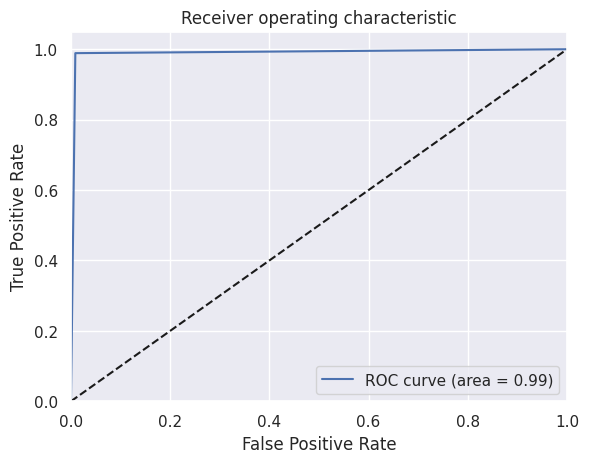

In [ ]:
from sklearn.metrics import classification_report , roc_curve , roc_auc_score , auc
auc_roc = roc_auc_score(y_test , y_pred)
fpr , tpr , thresholds = roc_curve(y_test , y_pred)
roc_auc = auc(fpr , tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df["Machine_ID"].unique()

array(['Makino-L1-Unit1-2013', 'Makino-L3-Unit1-2015',
       'Makino-L2-Unit1-2015'], dtype=object)

In [ ]:
df['Spindle_Bearing_Temperature(°C)'].max()

49.5

In [ ]:
df["Downtime"].unique()

array(['Machine_Failure', 'No_Machine_Failure'], dtype=object)

In [ ]:
# Create a sample test case for prediction

sample_test_case = np.array([[
    5,  # Month
    np.log1p(50),  # Hydraulic_Pressure_log
    np.log1p(30),  # Coolant_Pressure_log
    np.log1p(20),  # Air_System_Pressure_log
    np.log1p(40),  # Coolant_Temperature_log
    np.sqrt(60),  # Hydraulic_Oil_Temperature_sqrt
    np.sqrt(abs(df['Spindle_Bearing_Temperature(°C)'].max() - 55)),  # Spindle_Bearing_Temperature_reflect_sqrt
    np.sqrt(abs(df['Spindle_Vibration(µm)'].max() - 15)),  # Spindle_Vibration_reflect_sqrt
    10,  # Tool_Vibration_normal
    np.log1p(5000),  # Spindle_Speed_log
    np.sqrt(abs(df['Voltage(volts)'].max() - 220)),  # Voltage_reflect_sqrt
    np.log1p(150),  # Torque_log
    np.log1p(200),  # Cutting_log
    "Makino-L3-Unit1-2015"  # Machine_id
]])

# Reshape the Machine_id feature to a 2D array
Machine_id_feature = sample_test_case[:,-1].reshape(-1, 1)

# Apply OneHotEncoder
Machine_ohe = OH.transform(Machine_id_feature).toarray()

# Concatenate the one-hot encoded Machine_id with the rest of the sample test case
sample_test = np.concatenate((sample_test_case[:,:-1] , Machine_ohe), axis=1)

scaled_sample_test = ss.transform(sample_test)

y_pred = model.predict(scaled_sample_test)[0]

predict_prob = model.predict_proba(scaled_sample_test)[0]

max_prob = predict_prob[np.argmax(predict_prob)] * 100

if y_pred == 1:
  print(f"{int(max_prob)}% chance of Machine gets failure")
else:
  print(f"{int(max_prob)}% chance of No machine Failure")

62% chance of Machine gets failure


In [ ]:
import pickle

with open('One_hot.pkl', 'wb') as f:
    pickle.dump(OH , f)
with open('Machine_down_model.pkl', 'wb') as f:
    pickle.dump(model , f)
with open('Machine_scaler.pkl', 'wb') as f:
    pickle.dump(ss,f)